# Chapter 7 Working with Keras : A deep dive

## 7.1 A spectrum of workflows

The design of the Keras API is guided by the principle of progressive disclosure of complexity:

make it easy to get started, yet make it possible to handle high-complexity use
cases, only requiring incremental learning at each step

As such, there’s not a single “true” way of using Keras. Rather, Keras offers a spectrum of workflows, from the very simple to the very flexible.

## 7.2 Different ways to build Keras models

1.  The Sequential model, the most approachable API—it’s basically a Python list. As
such, it’s limited to simple stacks of layers.


2.  The Functional API, which focuses on graph-like model architectures. It represents a nice mid-point between usability and flexibility, and as such, it’s the
most commonly used model-building API.


3. Model subclassing, a low-level option where you write everything yourself from
scratch. This is ideal if you want full control over every little thing. However, you
won’t get access to many built-in Keras features, and you will be more at risk of
making mistakes

### 7.2.1 The Sequential Model

Listing 7.1

In [87]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
                        layers.Dense(64,activation="relu"),
                        layers.Dense(10,activation='softmax')
                        ])

Note that it is possible to build the same model via the __add()__ method

List 7.2

In [88]:
model = keras.Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

Because the shape of the layers' weights depends
on the shape of their input: until the input shape is known, they can’t be created.

List 7.3

In [89]:
# model.weights

As such, the preceding Sequential model does not have any weights (listing 7.3)
 until you actually call it on some data, or call its build() method with an input shape


Listing 7.4 Calling a model for the first time to build it

In [90]:
model.build(input_shape=(None,3))
model.weights[0][0]
## Builds the model . now the model will expect samples of shape(,3). 
## The None in the input shape signals that the batch size could be anything

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([-0.16043939,  0.16160363, -0.12016313, -0.1115216 , -0.02670726,
        0.17006758, -0.1278942 , -0.2899389 ,  0.10332727, -0.23342204,
       -0.20396397, -0.16928633,  0.00045142,  0.27283418,  0.20103699,
        0.07552055,  0.11161286, -0.13714032, -0.0354377 ,  0.04568198,
       -0.22649263, -0.02849546,  0.05666026, -0.05561247,  0.2342177 ,
       -0.18396786,  0.04053369,  0.1253789 ,  0.15995851,  0.11520663,
        0.16612884,  0.2893585 , -0.07179864,  0.15469593, -0.24424088,
        0.16130462, -0.19766578, -0.05453105, -0.0060131 , -0.05307442,
        0.2982496 , -0.17433208,  0.14090225,  0.09499717, -0.09303941,
        0.14781198, -0.01072973,  0.2967198 , -0.07120231,  0.25733638,
        0.2910149 ,  0.26713413,  0.26132244,  0.03009984, -0.04240042,
        0.09819847, -0.08438461,  0.10523519, -0.08222805, -0.21194232,
       -0.20960006,  0.00542068,  0.13717449, -0.20585375], dtype=float32)>

After the model has been builted , you can display its contents via __summary()__ method

Listing 7.5 

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                256       
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


As you can see, this model has a name of "sequential_2" You can give names to everything in Keras

Listing 7.6 Naming models and layers

In [92]:
model= keras.Sequential(name="wyn_model")
model.add(layers.Dense(64,activation='relu',name = 'First_layer_wyn'))
model.add(layers.Dense(10,activation='softmax',name = 'Second_layer_wyn'))

model.build((None,3))

model.summary()

Model: "wyn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer_wyn (Dense)     (None, 64)                256       
                                                                 
 Second_layer_wyn (Dense)    (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


When building a Sequential model incrementally, it’s useful to be able to print a summary of what the current model looks like after you add each layer. 

But you can’t print a summary until the model is built! 

There’s actually a way to have your Sequential
built on the fly: just declare the shape of the model’s inputs in advance.

Listing 7.7 Specifying the input shape of your model in advance

Use Input to declare the shape 
of the inputs. 

Note that the shape argument must be the 
shape of each sample, not  the shape of one batch.

In [93]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                256       
                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2 The Functional API

The Sequential model is easy to use, but its applicability is extremely limited: it can
only express models with a single input and a single output, applying one layer after
the other in a sequential fashion.

 In such cases, you’d build your model using the Functional API. This is what most
Keras models you’ll encounter in the wild use.

#### A Simple Example

The stack of two layers we used. 

Its Functional API verison looks like following listing

Listing 7.8 

In [95]:
inputs = keras.Input(shape=(3,),name='my_input')

features = layers.Dense(64,activation='relu')(inputs)

outputs = layers.Dense(10,activation='softmax')(features)

model = keras.Model(inputs= inputs,outputs=outputs)

Let's go it over step by step

We started by declaring an Input (note that you can also give names to these input
objects, like everything else)

The model will process batches where each sample 
has shape (3,). The number of samples per batch is 
variable (indicated by the None batch size).

In [96]:
inputs = keras.Input(shape=(3,),name='my_input')

We call such an object a symbolic tensor. 

It doesn’t contain any actual data, but it
encodes the specifications of the actual tensors of data that the model will see when
you use it. 

It stands for future tensors of data.

Next, we created a layer and __called it on__ the input

In [97]:
features = layers.Dense(64, activation="relu")(inputs)

All Keras layers can be called both on real tensors of data and on these symbolic tensors. In the latter case, they return a new symbolic tensor, with updated shape and
dtype information:

In [98]:
features.shape

TensorShape([None, 64])

After obtaining the final outputs, we instantiated the model by specifying its inputs
and outputs in the Model constructor:

In [99]:
outputs = layers.Dense(10,activation='softmax')(features)

In [100]:
models = keras.Model(inputs= inputs,outputs = outputs)

Here is the summary of the model

In [101]:
models.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_44 (Dense)            (None, 64)                256       
                                                                 
 dense_45 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### MULTI-INPUT, MULTI-OUTPUT MODELS

Unlike this toy model, most deep learning models don’t look like lists—they look like
graphs. They may, for instance, have multiple inputs or multiple outputs. It’s for this
kind of model that the Functional API really shines.


Let’s say you’re building a system to rank customer support tickets by priority and
route them to the appropriate department. Your model has three inputs:
1. The title of the ticket (text input)
2. The text body of the ticket (text input)
3. Any tags added by the user (categorical input, assumed here to be one-hot
encoded

Your model also has two outputs:
1. The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
2. The department that should handle the ticket (a softmax over the set of departments)

Listing 7.9 A multi-input, multi-output Functional model

In [102]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4


title = keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,),name='text_body')
tags = keras.Input(shape=(num_tags,),name='tags')

features = layers.Concatenate()([title,text_body,tags])
features = layers.Dense(64,activation='relu')(features)

priority = layers.Dense(1,activation='sigmoid',name='priority')(features)

department = layers.Dense(num_departments,activation='softmax',name='department')(features)

model = keras.Model(inputs=[title,text_body,tags],outputs=[priority,department])

model.summary()


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',       

Listing 7.10 Training a model by providing lists of input and target arrays

You can train your model in much the same way as you would train a Sequential
 model, by calling fit() with __lists of input and output data__. 


These lists of data should
 be in __the same order__ as the inputs you passed to the Model constructor

In [103]:
import numpy as np

num_samples = 1280

## X_train : 3 inputs
title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))

text_body_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))


tags_data = np.random.randint(0,2,size=(num_samples,num_tags))

## y_train : 2 outputs
priority_data = np.random.random(size=(num_samples,1))

department_data = np.random.randint(0,2,size=(num_samples,num_departments))


model.compile(optimizer=keras.optimizers.RMSprop(),
                loss = keras.losses.CategoricalCrossentropy(),
                metrics  = [['mean_absolute_error'],['accuracy']]
                )

model.fit(
            [title_data,text_body_data,tags_data],
            [priority_data,department_data],
            epochs = 1
)



40/40 [==============================] - 1s 12ms/step - loss: 25.8086 - priority_loss: 0.0000e+00 - department_loss: 25.8086 - priority_mean_absolute_error: 0.4935 - department_accuracy: 0.2453


In [104]:
model.evaluate(
            [title_data,text_body_data,tags_data],
            [priority_data,department_data]
)

40/40 [==============================] - 0s 5ms/step - loss: 34.1427 - priority_loss: 0.0000e+00 - department_loss: 34.1427 - priority_mean_absolute_error: 0.4942 - department_accuracy: 0.1344


[34.142662048339844,
 0.0,
 34.142662048339844,
 0.49419766664505005,
 0.13437500596046448]

In [105]:
priority_predicts , department_predicts = model.predict([title_data,text_body_data,tags_data])
print(priority_predicts)
print(department_predicts)

40/40 [==============================] - 0s 2ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[1.2384317e-12 4.4216391e-09 1.0000000e+00 8.4439983e-10]
 [6.5095459e-12 6.6097714e-09 1.0000000e+00 9.8543076e-11]
 [1.7776567e-12 2.3975562e-09 1.0000000e+00 2.1206913e-10]
 ...
 [6.7806633e-13 1.6777527e-09 1.0000000e+00 3.1215783e-10]
 [2.1869555e-12 1.6907051e-09 1.0000000e+00 3.2584330e-10]
 [2.2038389e-12 4.6194364e-09 1.0000000e+00 1.6804744e-10]]


If you don’t want to rely on input order (for instance, because you have many inputs
or outputs), you can also leverage the names you gave to the Input objects and the
output layers, and pass data via dictionaries.

Listing 7.11 Training a model by providing dicts of input and target arrays

In [106]:
model.compile(
            optimizer = keras.optimizers.RMSprop(),
            loss = {'priority':keras.losses.MeanSquaredError(),"department":keras.losses.CategoricalCrossentropy()  },
            metrics = {'priority':['mean_absolute_error'],"department":['accuracy']  },
            
)

model.fit(
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    {"department":department_data,"priority":priority_data}
)


40/40 [==============================] - 1s 9ms/step - loss: 41.5559 - priority_loss: 0.3297 - department_loss: 41.2263 - priority_mean_absolute_error: 0.4942 - department_accuracy: 0.2812


In [107]:
model.evaluate(
            
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    {"department":department_data,"priority":priority_data}
)

40/40 [==============================] - 0s 6ms/step - loss: 33.2248 - priority_loss: 0.3297 - department_loss: 32.8952 - priority_mean_absolute_error: 0.4942 - department_accuracy: 0.2664


[33.22483825683594,
 0.3296578824520111,
 32.895179748535156,
 0.49419766664505005,
 0.26640623807907104]

In [108]:
model.predict(
           
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    
)

40/40 [==============================] - 0s 4ms/step


[array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[2.8929740e-06, 2.7313715e-01, 7.2685999e-01, 7.1691092e-23],
        [2.9793136e-05, 8.0551261e-01, 1.9445761e-01, 5.4032523e-24],
        [1.0464366e-05, 4.2909589e-01, 5.7089359e-01, 5.7784150e-23],
        ...,
        [3.8515691e-06, 4.6289614e-01, 5.3710008e-01, 1.0757531e-22],
        [1.8599145e-05, 3.6414874e-01, 6.3583267e-01, 6.4672098e-23],
        [7.0158417e-06, 7.6670337e-01, 2.3328960e-01, 4.4308954e-23]],
       dtype=float32)]

#### THE POWER OF THE FUNCTIONAL API: ACCESS TO LAYER CONNECTIVITY

A Functional model is an explicit graph data structure. This makes it possible to
inspect how layers are connected and reuse previous graph nodes (which are layer
outputs) as part of new models. 

It also nicely fits the “mental model” that most researchers use when thinking about a deep neural network: a graph of layers. This enables
two important use cases: model visualization and feature extraction.

Let’s visualize the connectivity of the model we just defined (the topology of the
model).


You can plot a Functional model as a graph with the __plot_model()__ utility (see
figure 7.2).

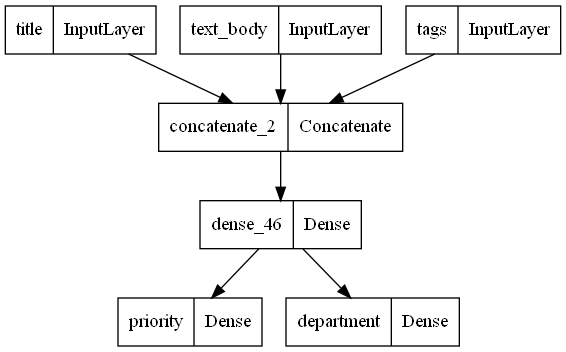

In [109]:
keras.utils.plot_model(model,'Ticket_Classifier.png')

You can also let it show the shape information

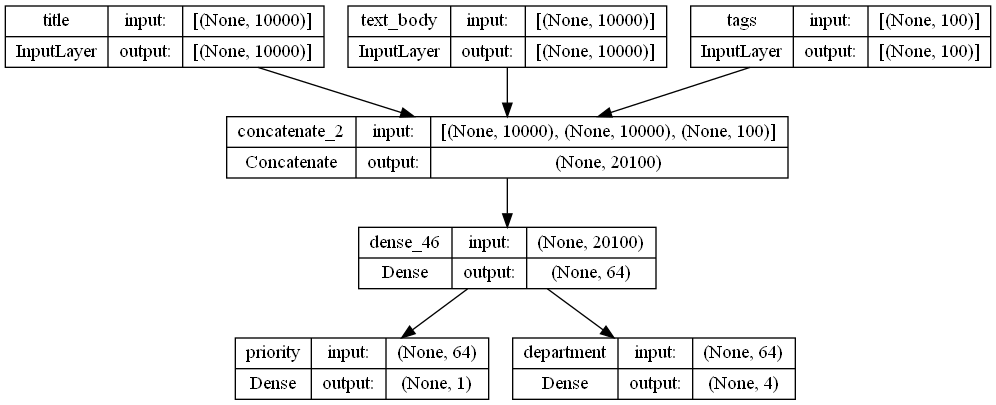

In [110]:
keras.utils.plot_model(model,'Ticket_Classifier_with_shape.png',show_shapes=1)

Access to layer connectivity also means that you can inspect and reuse individual
 nodes (layer calls) in the graph. 
 
 The __model.layers__ model property provides the list
 of layers that make up the model, and for each layer you can query __layer.input__ and
 __layer.output__.

In [111]:
model.layers

See that the __model.layer[3]__ is concatenate, we can check what's in it by __layers.input__ and __layers.output__

In [112]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [113]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

Let’s say you want to add another output to the previous model—you want to estimate how long a given issue ticket will take to resolve, a kind of difficulty rating. 

You could do this via a classification layer over three categories: “quick,” “medium,” and
“difficult.”

You don’t need to recreate and retrain a model from scratch. You can start
from the intermediate features of your previous model, since you have access to them,
like this

Listing 7.13 Creating a new model by reusing intermediate layer outputs

In [114]:
features= model.layers[4].output

__layers[4]__ is our intermediate 
Dense layer

In [115]:
difficulty = layers.Dense(4,activation='softmax',name='difficulty')(features)

new_model = keras.Model(
          inputs=[title,text_body,tags],outputs=[priority,department,difficulty]
)

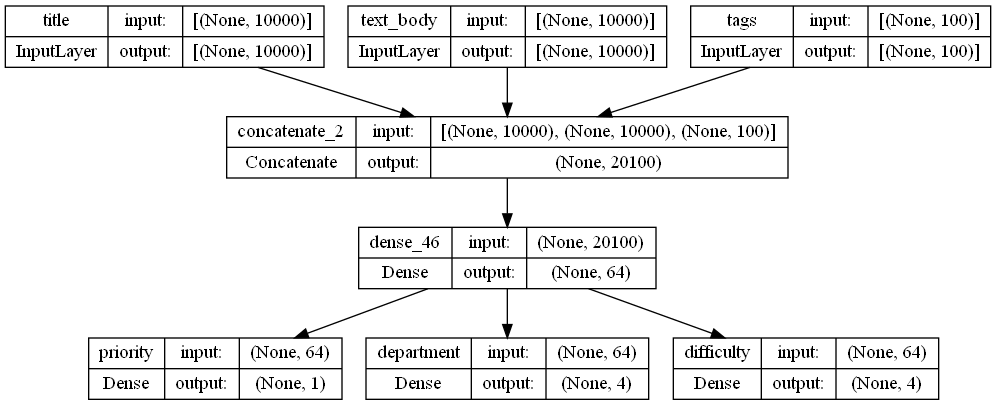

In [116]:
keras.utils.plot_model(new_model,'New_model_with_difficulties.png',show_shapes=1)

###  7.2.3 Subclassing the Model Class

The last model-building pattern you should know about is the most advanced one:

Model subclassing. You learned in chapter 3 how to subclass the Layer class to create
custom layers. Subclassing Model is pretty similar:

1. In the __"__init__()"__ method, define the layers the model will use.

2. In the __call()__ method, define the forward pass of the model, reusing the layers
previously created.

3. Instantiate your subclass, and call it on data to create its weights.

#### REWRITING OUR PREVIOUS EXAMPLE AS A SUBCLASSED MODEL

Listing 7.14 A simple subclassed model

In [117]:
class CostomerTicketModel(keras.Model):
    def __init__(self,num_departments:int):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64,activation='relu')
        self.priority_scorer = layers.Dense(1,activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments,activation='softmax')
    
    def call(self,inputs:dict):
        title = inputs["title"]
        text_body = inputs['text_body']
        tags = inputs['tags']

        features = self.concat_layer([title,text_body,tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority,department

Now let's __init__ the model as this class

In [118]:
model = CostomerTicketModel(num_departments=4)


Then let's __call__ the class

In [119]:
priority,department = model.call(inputs=        
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    )

Or you can __call__ in this way

In [120]:
priority,department = model(inputs=        
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    )

So far, everything looks very similar to Layer subclassing, a workflow you encountered
in chapter 3. What, then, is the difference between a Layer subclass and a Model subclass? It’s simple: a “layer” is a building block you use to create models, and a “model”
is the top-level object that you will actually train, export for inference, etc. 

In short, a
Model has fit(), evaluate(), and predict() methods. Layers don’t. Other than that,
the two classes are virtually identical.

Let's review that how the model bulit before:

"model = keras.Model(inputs=[title,text_body,tags],outputs=[priority,department])"

which means our __call()__method has the same function as "inputs=",but the difference is that we sepcified the output rather than defining it by ourselves in __Model()__

After figuring it out , now we can treat the class as a common model 


You can __compile()__ and train the __model__ just like before

In [121]:
model.compile(optimizer=keras.optimizers.RMSprop(),
                loss = [keras.losses.MeanSquaredError(),keras.losses.CategoricalCrossentropy()],
                metrics = [['mean_absolute_error'],['accuracy']]
 )

The structure of the target 
data must match exactly what is 
returned by the call() method—
here, a list of two elements.

In [122]:
model.fit(  
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    [priority_data,department_data],epochs = 1
      )

40/40 [==============================] - 1s 13ms/step - loss: 21.7433 - output_1_loss: 0.3263 - output_2_loss: 21.4170 - output_1_mean_absolute_error: 0.4914 - output_2_accuracy: 0.3180


In [123]:
priority_preds, department_preds = model.predict({"title": title_data,
 "text_body": text_body_data,
 "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


#### BEWARE: WHAT SUBCLASSED MODELS DON’T SUPPORT

This freedom comes at a cost: with subclassed models, you are responsible for more of
the model logic, which means your potential error surface is much larger. 

As a result,
you will have more debugging work to do. You are developing a new Python object,
not just snapping together LEGO bricks.

For instance, because the way layers are connected to each other is hidden inside
 the body of the __call()__ method, you cannot access that information. Calling __summary()__ will not display layer connectivity, and you cannot plot the model topology via
 __plot_model()__

### 7.2.4 Mixing and Matching different components

All models in the Keras API
can smoothly interoperate with each other, whether they’re Sequential models, Functional models, or subclassed models written from scratch. 

They’re all part of the same spectrum of workflows.
 
 
For instance, you can use a subclassed layer or model in a Functional model.

Listing 7.15 Creating a Functional model that includes a subclassed model

In [124]:
class Classifier(keras.Model):
    def __init__(self,num_class=2):
        super().__init__()
        if num_class == 2:
            num_units = 1
            activation = 'sigmoid'
        else :
            num_units = num_class
            activation = 'softmax'
        
        self.dense = layers.Dense(num_units,activation=activation)
    
    def call(self,inputs):
        return self.dense(inputs)
        

In [125]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64,activation='relu')(inputs)
outputs = Classifier(num_class=10)(features)
model  =keras.Model(inputs= inputs,outputs= outputs)

Inversely, you can use a Functional model as part of a subclassed layer or model.

Listing 7.16 Creating a subclassed model that includes a Functional model

In [126]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1,activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs,outputs=outputs)


In [127]:
class MyModel(keras.Model):
    def __init__(self,num_class = 2):
        super().__init__()
        self.dense = layers.Dense(64,activation='relu')
        self.classifier= binary_classifier
    def call(self,inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()(inputs)

In the book it was typed as 

model = MyModel()

but I suggusted it should be 

model = Mymodel()(inputs)

### 7.2.5 Remember: Use the right tool for the job

 In general, the Functional API provides you with a pretty good trade-off between
ease of use and flexibility. 

It also gives you direct access to layer connectivity, which is
very powerful for use cases such as model plotting or feature extraction. If you can use
the Functional API—that is, if your model can be expressed as a directed acyclic graph
of layers—I recommend using it over model subclassing

 Going forward, all examples in this book will use the Functional API, simply
because all the models we will work with are expressible as graphs of layers. We will,
however, make frequent use of subclassed layers. 


In general, using Functional models
that include subclassed layers provides the best of both worlds: high development flexibility while retaining the advantages of the Functional API

## 7.3 Using built-in training and evaluation loops

Keras provides you with different workflows for training models. 

They can be as simple as calling fit() on your data, or as advanced as writing a new training algorithm from scratch

Listing 7.17 The standard workflow: compile(), fit(), evaluate(), predict()

In [128]:
from keras.datasets import mnist
import numpy as np
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512,activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10,activation='softmax')(features)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model


In [129]:
(images,labels),(test_images,test_labels) = mnist.load_data()

images = images.reshape((60000,28*28))
images = images.astype('float32')/255


test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_images,val_images = images[10000:],images[:10000]


train_labels,val_labels = labels[10000:],labels[:10000]

In [130]:
model = get_mnist_model()
model.compile(
            optimizer = keras.optimizers.RMSprop(),
            loss = keras.losses.SparseCategoricalCrossentropy(),
            metrics = ['accuracy']
)


In [131]:
model.fit(train_images,train_labels,
            epochs = 3,
            validation_data = (val_images,val_labels)
            
            )


Epoch 1/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2965 - accuracy: 0.9114 - val_loss: 0.1451 - val_accuracy: 0.9588
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1655 - accuracy: 0.9529 - val_loss: 0.1196 - val_accuracy: 0.9672
Epoch 3/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1388 - accuracy: 0.9630 - val_loss: 0.1128 - val_accuracy: 0.9705


In [132]:
test_metric = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9713


In [133]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


There are a couple of ways you can customize this simple workflow:

1.  Provide your own custom metrics.
2.  Pass callbacks to the fit() method to schedule actions to be taken at specific
points during training.

### 7.3.1 Writing your own metrics

Commonly used metrics for classification and regression are
already part of the built-in keras.metrics module, and most of the time that’s what
you will use. But if you’re doing anything out of the ordinary, you will need to be able
to write your own metrics. It’s simple!

A Keras metric is a subclass of the keras.metrics.Metric class. Like layers, a metric has an internal state stored in TensorFlow variables. 

Unlike layers, these variables aren’t updated via backpropagation, so you have to write the state-update logic yourself, which happens in the __update_state()__ method

Listing 7.18 Implementing a custom metric by subclassing the Metric class

In [134]:
import tensorflow as tf
class RootMeanSquaredError(keras.metrics.Metric):
    ## Define the state variables in theconstructor. Like for layers, you have access to
    ##the add_weight() method.
    def __init__(self,name = 'rmse',**kwargs):
        super().__init__(name=name,**kwargs)
        self.mse_sum = self.add_weight(name='mse_sum',initializer = 'zeros')
        self.total_samples = self.add_weight( name='total_samples',initializer='zeros',dtype ='int32' )


### To match MNIST model, we expect categorical predictions and integer labels
    def update_state(self,y_true,y_pred,sample_weight = None):
        y_true = tf.one_hot(y_true,depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true-y_pred ))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
###Implement the state update logic in update_state(). The y_true argument
##is the targets (or labels) for one batch, while y_pred represents the
# corresponding predictions from the model. You can ignore the
# sample_weight argument—we won’t use it here.

    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast( self.total_samples ,tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

Meanwhile, you also need to expose a way to reset the metric state without having to
reinstantiate it—this enables the same metric objects to be used across different
epochs of training or across both training and evaluation. 

You do this with the
__reset_state()__ method

It can be used like built-in one

In [135]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
 epochs=3,
 validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2945 - accuracy: 0.9128 - rmse: 7.1830 - val_loss: 0.1450 - val_accuracy: 0.9587 - val_rmse: 7.3607
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1658 - accuracy: 0.9535 - rmse: 7.3540 - val_loss: 0.1196 - val_accuracy: 0.9671 - val_rmse: 7.4045
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0990 - accuracy: 0.9733 - rmse: 7.4345


### 7.3.2 Using callbacks

If you want to avoid bad outcomes (and
thus wasted paper airplanes), it’s smarter to use, not a paper plane, but a drone that
can sense its environment, send data back to its operator, and automatically make steering decisions based on its current state. 

The Keras __callbacks__ API will help you
transform your call to model.fit() from a paper airplane into a smart, autonomous
drone that can self-introspect and dynamically take action.

A callback is an object (a class instance implementing specific methods) that is
passed to the model in the call to fit() and that is called by the model at various
points during training. 

It has access to all the available data about the state of the
model and its performance, and it can take action: interrupt training, save a model,
load a different weight set, or otherwise alter the state of the model.

Here are some examples of ways you can use callbacks:
+ $Model checkpointing$—Saving the current state of the model at different points
during training.

+ $Early stopping$—Interrupting training when the validation loss is no longer
improving (and of course, saving the best model obtained during training).

+ $Dynamically-adjusting-the-value-of-certain-parameters-during-training$—Such as the
learning rate of the optimizer.

+ $Logging-training-and-validation-metrics-during-training,-or-visualizing-the-representations-learned-by-the-model-as they’re-updated$ —The fit() progress bar that you’re
familiar with is in fact a callback!

The keras.callbacks module includes a number of built-in callbacks (this is not an
exhaustive list):

keras.callbacks.ModelCheckpoint

keras.callbacks.EarlyStopping

keras.callbacks.LearningRateScheduler

keras.callbacks.ReduceLROnPlateau

keras.callbacks.CSVLogger

#### THE EARLYSTOPPING AND MODELCHECKPOINT CALLBACKS

A much better way to
 handle this is to stop training when you measure that the validation loss is no longer
 improving. This can be achieved using the EarlyStopping callback

The EarlyStopping callback interrupts training once a target metric being monitored has stopped improving for a fixed number of epochs.

For instance, this callback
allows you to interrupt training as soon as you start overfitting, thus avoiding having to
retrain your model for a smaller number of epochs.


This callback is typically used in combination with __ModelCheckpoint__, which lets you continually save the model during
training (and, optionally, save only the current best model so far: the version of the
model that achieved the best performance at the end of an epoch)

Listing 7.19 Using the callbacks argument in the fit() method

In [136]:

# Callbacks are passed to the model via the
# callbacks argument in fit(), which takes a list of
# callbacks. You can pass any number of callbacks.
callbacks_list = [
    # Interrupts training when improvement stops
    keras.callbacks.EarlyStopping(
    #  Monitors the model’s validation accuracy
        monitor = 'val_accuracy',
    # Interrupts training when accuracy has stopped improving for two epochs
        patience = 2
    ),

    #Saves the current weights after every epoch
    keras.callbacks.ModelCheckpoint(
        #Path to the destination model file
        filepath = 'checkpoint_path.keras',
        # These two arguments mean you won’t overwrite the model file unless val_loss 
        # has improved, which allows you to keep the best model seen during training
        monitor = 'val_accuracy',
        save_best_only = True
    )
]

In [137]:
model = get_mnist_model()

model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"]) 

model.fit(train_images, train_labels, 
 epochs=5, 
 callbacks=callbacks_list, 
 validation_data=(val_images, val_labels))

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2928 - accuracy: 0.9153 - val_loss: 0.1681 - val_accuracy: 0.9512
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1649 - accuracy: 0.9536 - val_loss: 0.1240 - val_accuracy: 0.9689
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1393 - accuracy: 0.9626 - val_loss: 0.1147 - val_accuracy: 0.9693
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1259 - accuracy: 0.9673 - val_loss: 0.1067 - val_accuracy: 0.9749
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1169 - accuracy: 0.9707 - val_loss: 0.1144 - val_accuracy: 0.9745


Note that you can always save models manually after training as well—just call

__model.save('my_checkpoint_path')__ 

To reload the model you’ve saved, just use 


__model = keras.models.load_model("checkpoint_path.keras")__

### 7.3.3 Writing your own callbacks

If you need to take a specific action during training that isn’t covered by one of the
built-in callbacks, you can write your own callback. 


Callbacks are implemented by subclassing the keras.callbacks.Callback class.

You can then implement any number
of the following transparently named methods, which are called at various points
during training

on_epoch_begin(epoch, logs) 

on_epoch_end(epoch, logs) 

on_batch_begin(batch, logs) 

on_batch_end(batch, logs) 

on_train_begin(logs) 

on_train_end(logs)

These methods are all called with a logs argument, which is a dictionary containing
information about the previous batch, epoch, or training run—training and validation metrics, and so on.

 Here’s a simple example that saves a list of per-batch loss values during training
and saves a graph of these values at the end of each epoch.

Listing 7.20 Creating a custom callback by subclassing the Callback class

In [138]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self,logs):
        self.per_batch_losses = []

    def on_batch_end(self,batch,logs):
        self.per_batch_losses.append(logs.get("loss"))
    
    def on_epoch_end(self,epoch,logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)),self.per_batch_losses,label ='Training Loss for each batch' )
        plt.xlabel(f'Batch (epoch{epoch})')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f'Batch (epoch{epoch})')
        self.per_batch_losses = []

    

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2960 - accuracy: 0.9124 - val_loss: 0.1483 - val_accuracy: 0.9554
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1610 - accuracy: 0.9546 - val_loss: 0.1294 - val_accuracy: 0.9666
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1384 - accuracy: 0.9627 - val_loss: 0.1103 - val_accuracy: 0.9713
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1237 - accuracy: 0.9679 - val_loss: 0.1070 - val_accuracy: 0.9728
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1178 - accuracy: 0.9711 - val_loss: 0.1044 - val_accuracy: 0.9756
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1072 - accuracy: 0.9737 - val_loss: 0.1197 - val_accuracy: 0.9746
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1049 - accuracy: 0.9750 - val_loss: 0.1151 - val_accu

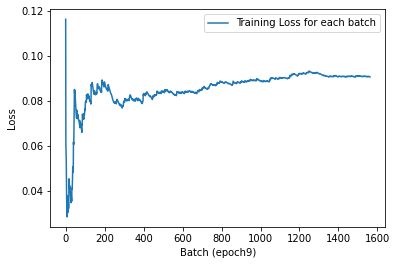

In [139]:
model = get_mnist_model()

model.compile(optimizer=keras.optimizers.RMSprop(),
                loss = keras.losses.SparseCategoricalCrossentropy(),
                metrics= ['accuracy']
)

model.fit(train_images,train_labels,epochs=10,callbacks=[LossHistory()],validation_data=(val_images,val_labels))

### 7.3.4 Monitoring and visualization with TensorBoard

Making progress is an iterative process, a loop—you start with
an idea and express it as an experiment, attempting to validate or invalidate your idea.
You run this experiment and process the information it generates.

Keras helps you go from idea to experiment in the least
possible time, and fast GPUs can help you get from experiment to result as quickly as
possible.

TensorBoard (www.tensorflow.org/tensorboard) is a browser-based application that
you can run locally. It’s the best way to monitor everything that goes on inside your
model during training. With TensorBoard, you can


1. Visually monitor metrics during training
2. Visualize your model architecture
3. Visualize histograms of activations and gradients
4. Explore embeddings in 3D

 The easiest way to use TensorBoard with a Keras model and the __fit()__ method is to
use the __keras.callbacks.TensorBoard__ callback

In [140]:
model = get_mnist_model()


model.compile(optimizer=keras.optimizers.RMSprop(),
                loss = keras.losses.SparseCategoricalCrossentropy(),
                metrics= ['accuracy']
)

tensorboard = keras.callbacks.TensorBoard(log_dir='E:\\Python-Machine-Learning\\Deep_Learning_With_python\\Tensorboard\\')

model.fit(train_images,train_labels,epochs=10,callbacks=[tensorboard],validation_data=(val_images,val_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2921 - accuracy: 0.9138 - val_loss: 0.1464 - val_accuracy: 0.9574
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1657 - accuracy: 0.9536 - val_loss: 0.1235 - val_accuracy: 0.9674
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1382 - accuracy: 0.9625 - val_loss: 0.1166 - val_accuracy: 0.9709
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1267 - accuracy: 0.9670 - val_loss: 0.1096 - val_accuracy: 0.9750
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1215 - accuracy: 0.9699 - val_loss: 0.1107 - val_accuracy: 0.9757
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1083 - accuracy: 0.9730 - val_loss: 0.1133 - val_accuracy: 0.9760
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1034 - accuracy: 0.9754 - val_loss: 0.1127 - val_ac

In the VSCODE, you have installed a plug-in for tensorboard, However, you should change the path you load file every time.

The way to change the folde is 

1.  ctrl+shift+p 

2.  type: Python : Launch TensorBoard

3. Choose the folder or type the path 

4. Then the tensorboard window will appear!

## 7.4 Writing your own training and evaluation loops

The fit() workflow strikes a nice balance between ease of use and flexibility. It’s what
you will use most of the time. However, it isn’t meant to support everything a deep
learning researcher may want to do, even with custom metrics, custom losses, and custom callbacks.

 After all, the built-in fit() workflow is solely focused on supervised learning: a setup
where there are known targets (also called labels or annotations) associated with your
input data, and where you compute your loss as a function of these targets and the
model’s predictions

 After all, the built-in fit() workflow is solely focused on supervised learning: a setup
where there are known targets (also called labels or annotations) associated with your
input data, and where you compute your loss as a function of these targets and the
model’s predictions

There are other setups where no explicit targets are present, such as generative learning (which we will discuss in chapter 12), self-supervised learning (where targets
are obtained from the inputs), and reinforcement learning (where learning is driven by
occasional “rewards,” much like training a dog). Even if you’re doing regular supervised learning, as a researcher, you may want to add some novel bells and whistles that
require low-level flexibility.

As a reminder, the contents of a typical training loop look like this:

1. Run the forward pass (compute the model’s output) inside a gradient tape to
obtain a loss value for the current batch of data.

2. Retrieve the gradients of the loss with regard to the model’s weights.

3. Update the model’s weights so as to lower the loss value on the current batch
of data.

### 7.4.1 Training versus inference

In the low-level training loop examples you’ve seen so far, 

step 1 (the forward pass) was done via __predictions = model(inputs)__

step 2 (retrieving the gradients
 computed by the gradient tape) was done via __gradients = tape.gradient(loss,
 model.weights)__

Remember to pass __training
 =True__ when you call a Keras model during the forward pass! 
 
 Our forward pass thus
 becomes __predictions = model(inputs, training=True)__

In addition, note that when you retrieve the gradients of the weights of your
 model, you should not use tape.gradients(loss, model.weights), 
 
but rather __tape
 .gradients(loss, model.trainable_weights)__.

1. Trainable weights—These are meant to be updated via backpropagation to minimize the loss of the model, such as the kernel and bias of a Dense layer.


2. Non-trainable weights—These are meant to be updated during the forward pass
by the layers that own them. 

For instance, if you wanted a custom layer to keep
a counter of how many batches it has processed so far, that information would
be stored in a non-trainable weight, and at each batch, your layer would increment the counter by one.

Among Keras built-in layers, the only layer that features __non-trainable__ weights is the
 __BatchNormalization__ layer, which we will discuss in chapter 9

A supervised-learning training step ends up looking like this

In [141]:
def train_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs,training=True)
        loss = loss_fn(tragets,predictions)
    gradients = tape.gradient(loss,model.trainable_weights)
    optimizer.apply_gradients( zip(model.trainable_weights,gradients) )

### 7.4.2 Low-Level usage of metrics

In a low-level training loop, you will probably want to leverage Keras metrics (whether
custom ones or the built-in ones). 

You’ve already learned about the metrics API: simply call update_state(y_true, y_pred) for each batch of targets and predictions, and
then use result() to query the current metric value

In [142]:
metric = keras.metrics.SparseCategoricalAccuracy()

targets = [0,1,2]
predictions = [[0.9,0.1,0.92],[0,1,0],[0,0,1]]
metric.update_state(targets,predictions)
current_result = metric.result()
print(f"result: { current_result}")

result: 0.6666666865348816


In [143]:
mean_tracker = keras.metrics.Mean()


values = [0,1,2,3,4]
for value in values:
    mean_tracker.update_state(value)


current_result = mean_tracker.result()
print(f"result: { current_result}")

result: 2.0


### 7.4.3 A complete training and evaluation loop

Let’s combine the forward pass, backward pass, and metrics tracking into a fit()-like
training step function that takes a batch of data and targets and returns the logs that
would get displayed by the fit() progress bar

Listing 7.21 Writing a step-by-step training loop: the training step function

In [155]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

#Prepare a Mean Metric tracker to keep track of the loss average
loss_tracking_metric = keras.metrics.Mean()



In [156]:
def train_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs,training = True)
        loss = loss_fn(targets,predictions)
    gradients = tape.gradient(loss,model.trainable_weights)
    optimizer.apply_gradients( zip(gradients,model.trainable_weights) )
    
    logs = {}

    for metric in metrics:
        ##Extract the keras.metrics.Accuracy() from the list
        metric.update_state(targets,predictions)
        ## logs = {"accuracy":reults}
        logs[metric.name] =metric.result()
    
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()

    return logs


We will need to reset the state of our metrics at the start of each epoch and before running evaluation. Here’s a utility function to do it.``

Listing 7.22 Writing a step-by-step training loop: resetting the metrics

In [157]:
def reset_metrics ():
    for metric in metrics:
        metric.reset_state()
    
    loss_tracking_metric.reset_state()


We can now lay out our complete training loop. 

Note that we use a tf.data.Dataset
object to turn our NumPy data into an iterator that iterates over the data in batches of
__size 32__

Listing 7.23 Writing a step-by-step training loop: the loop itself

In [158]:
(images,labels),(test_images,test_labels) = mnist.load_data()

images = images.reshape((60000,28*28))
images = images.astype('float32')/255


test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_images,val_images = images[10000:],images[:10000]


train_labels,val_labels = labels[10000:],labels[:10000]




training_dataset = tf.data.Dataset.from_tensor_slices(  (train_images,train_labels)   )

training_dataset = training_dataset.batch(32)
print(training_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>


In [159]:
epochs = 3

for epoch in range(epochs):
    reset_metrics()
    for inputs_batch,targets_batch in training_dataset:
        
        logs = train_step(inputs= inputs_batch,targets= targets_batch)

        print("Results at at the end of epoch {}".format(epoch))
        for key,value in logs.items():
            print(" {} = {:.4f} ".format(key,value))


Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.0625 
 loss = 2.6221 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.1719 
 loss = 2.4378 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.1979 
 loss = 2.3944 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.2891 
 loss = 2.2014 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.3375 
 loss = 2.0867 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.3594 
 loss = 2.0051 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.3750 
 loss = 1.9512 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.3906 
 loss = 1.8847 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.4201 
 loss = 1.8131 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.4344 
 loss = 1.7607 
Results at at the end of epoch 0
 sparse_categorical_accuracy = 0.4688 
 loss = 1.6906 
Results at at the end of epoch 0

And here’s the evaluation loop: a simple for loop that repeatedly calls a __test_step()__
function, which processes a single batch of data. 

The __test_step()__ function is just a subset of the logic of __train_step()__.  Let __training=False__

It omits the code that deals with updating the weights of the model—that is to say, everything involving the GradientTape and the optimizer

Listing 7.24 Writing a step-by-step evaluation loop

In [167]:
def test_step(inputs,targets):
    predictions = model(inputs,training=False)
    
    loss = loss_fn(targets,predictions)

    logs = {}

    for metric in metrics:
        metric.update_state(targets,predictions)
        logs["val_"+metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()

    return logs

In [170]:
val_datasets= tf.data.Dataset.from_tensor_slices((val_images,val_labels))
val_datasets = val_datasets.batch(32)


In [171]:
reset_metrics()
for inputs_batch,output_batch in val_datasets:
    logs = test_step(inputs=inputs_batch,targets=output_batch)
print("Evaluation Results")
for key ,value in logs.items():
     print("{} :{:.4f}".format(key,value))

Evaluation Results
val_sparse_categorical_accuracy :0.9661
val_loss :0.1321


Congrats—you’ve just reimplemented fit() and evaluate()! Or almost: fit()
and evaluate() support many more features, including large-scale distributed computation, which requires a bit more work. It also includes several key performance
optimizations

### 7.4.4 Make it fast with tf.function

You may have noticed that your custom loops are running significantly slower than the
built-in fit() and evaluate(), despite implementing essentially the same logic.


That’s because, by default, TensorFlow code is __executed line by line__, eagerly, much like
NumPy code or regular Python code. Eager execution makes it easier to debug your
code, but it is far from optimal from a performance standpoint.


It’s more performant to __compile__ your TensorFlow code into a computation graph that
can be globally optimized in a way that code interpreted line by line cannot. 


The syntax to do this is very simple: just __add a @tf.function__ to any function you want to compile before executing, as shown in the following listing

Listing 7.25 Adding a @tf.function decorator to our evaluation-step function

In [172]:
@tf.function

def test_step(inputs,targets):
    predictions = model(inputs,training=False)
    
    loss = loss_fn(targets,predictions)

    logs = {}

    for metric in metrics:
        metric.update_state(targets,predictions)
        logs["val_"+metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()

    return logs

val_datasets= tf.data.Dataset.from_tensor_slices((val_images,val_labels))
val_datasets = val_datasets.batch(32)

reset_metrics()
for inputs_batch,output_batch in val_datasets:
    logs = test_step(inputs=inputs_batch,targets=output_batch)
print("Evaluation Results")
for key ,value in logs.items():
     print("{} :{:.4f}".format(key,value))
    

Evaluation Results
val_sparse_categorical_accuracy :0.9661
val_loss :0.1321


It goes from taking 1.9s to run the evaluation loop to only 0.8s

Remember, while you are debugging your code, prefer running it eagerly, without
any @tf.function decorator. 
 
It’s easier to track bugs this way. Once your code is working and you want to make it fast, add a __@tf.function__ decorator to your training step
and your evaluation step—or any other performance-critical function.

### 7.4.5 Leveraging fit() with a custom training loop

What if you need a custom training algorithm, but you still want to leverage the
power of the built-in Keras training logic? 

There’s actually a middle ground between
fit() and a training loop written from scratch: you can provide a custom training
step function and let the framework do the rest.


You can do this by overriding the __train_step()__ method of the Model class. This is
the function that is called by __fit()__ for every batch of data. You will then be able to call
__fit()__ as usual, and it will be running your own learning algorithm under the hood.
 Here’s a simple example:

1.  We create a new class that subclasses __keras.Model__. 



2. We override the method train_step(self, data). Its contents are nearly identical to what we used in the previous section. It returns a dictionary mapping
metric names (including the loss) to their current values.


3.  We implement a metrics property that tracks the model’s Metric instances.
This enables the model to automatically call __reset_state()__ on the model’s
metrics at the start of each epoch and at the start of a call to __evaluate()__, so you
don’t have to do it by hand.

Listing 7.26 Implementing a custom training step to use with fit()

In [183]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()

loss_tracker = keras.metrics.Mean(name='loss')



class CustomModel(keras.Model):
    def train_step(self,data):
        inputs,targets = data
        with tf.GradientTape() as tape:
            ## We use self(inputs, training=True) instead of model(inputs, training=True), since our model is the class itself.
            predictions = self(inputs,training = True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss,model.trainable_weights)

        ## Here we still lack of optimizer, which should be set in model.compile()
        optimizer.apply_gradients(zip(gradients,model.trainable_weights))

        loss_tracker.update_state(loss)
        return{"loss":loss_tracker.result()}
    @property
    def metrics(self):
        return[loss_tracker]

The __CustomModel()__ class indeed does the same job as the __model.complie()__

In [184]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2962
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1641
Epoch 3/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1376


Let us check if the @property works ? 

In [188]:
model.metrics[0].result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.1375791>

YES

There are a couple of points to note:


+  This pattern does not prevent you from building models with the Functional
 API. You can do this whether you’re building Sequential models, Functional
 API models, or subclassed models.


+ You don’t need to use a @tf.function decorator when you override train_
 step—the framework does it for you.

Now, what about metrics, and what about configuring the loss via compile()?

 After  you’ve called compile(), you get access to the following:

1. __self.compiled_loss__—The loss function you passed to compile().  

2. __self.compiled_metrics__—A wrapper for the list of metrics you passed, which
 allows you to call self.compiled_metrics.update_state() to update all o 
 your metrics at once.

3. __self.metrics__—The actual list of metrics you passed to compile(). Note that it
 also includes a metric that tracks the loss, similar to what we did manually with
 our loss_tracking_metric earlier.

In [198]:
class CustomModel(keras.Model):
    def train_step(self,data):
        inputs,targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs,training = True)
            loss = self.compiled_loss(targets,predictions)
            
        gradents = tape.gradient(loss,model.trainable_weights)
        optimizer.apply_gradients(zip(gradents,model.trainable_weights))

        ## Update model metrics via self.compiled_metrics
        self.compiled_metrics.update_state(targets,predictions)

        return { m.name:m.result() for m in self.metrics }

Let's try it

In [199]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)

model = CustomModel(inputs, outputs)


model.compile(optimizer=keras.optimizers.RMSprop(),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=[keras.metrics.SparseCategoricalAccuracy()])

    
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2944 - sparse_categorical_accuracy: 0.9114
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1643 - sparse_categorical_accuracy: 0.9537
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1405 - sparse_categorical_accuracy: 0.9625


In [203]:
model.metrics[0].result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.14047495>

## Summary 

1. Keras offers a spectrum of different workflows, based on the principle of progressive disclosure of complexity. They all smoothly inter-operate together.

2. You can build models via the Sequential class, via the Functional API, or by subclassing the Model class. Most of the time, you’ll be using the Functional API.

3. The simplest way to train and evaluate a model is via the default fit() and
evaluate() methods.

4. Keras callbacks provide a simple way to monitor models during your call to
fit() and automatically take action based on the state of the model.

5. You can also fully take control of what fit() does by overriding the train_
step() method.

6. Beyond fit(), you can also write your own training loops entirely from scratch.
This is useful for researchers implementing brand-new training algorithms